In [1]:
import numpy as np
import utils.exampleFunctions as ex_func 
import utils.generalDefinitions as gen_def
import utils.models as models
import utils.samplers as samplers

Iteration 1, RMSE: 101.07485234113992
Iteration 2, RMSE: 98.03391592995833
Iteration 3, RMSE: 103.69954551262552
Iteration 4, RMSE: 114.35916732958215
Iteration 5, RMSE: 119.14622680932425
Iteration 6, RMSE: 45.49351299378891
Iteration 7, RMSE: 125.98753849690503
Iteration 8, RMSE: 152.00366414681986
Iteration 9, RMSE: 56.50662892054214
Iteration 10, RMSE: 55.91642913211326
Iteration 11, RMSE: 64.22354511145565
Iteration 12, RMSE: 58.28455443232654
Iteration 13, RMSE: 286.0450449569198
Iteration 14, RMSE: 285.4190738809911
Iteration 15, RMSE: 142.30504608005774
Iteration 16, RMSE: 164.40232674358595
Iteration 17, RMSE: 160.6235070207797
Iteration 18, RMSE: 119.96231225140683
Iteration 19, RMSE: 163.90683307364154
Iteration 20, RMSE: 192.17815839490194
Iteration 21, RMSE: 130.17510470513284
Iteration 22, RMSE: 146.05909377880766
Iteration 23, RMSE: 161.3349588377528
Iteration 24, RMSE: 122.94001564770372
Iteration 25, RMSE: 202.33854850090853
Iteration 26, RMSE: 221.33722906172653
Itera

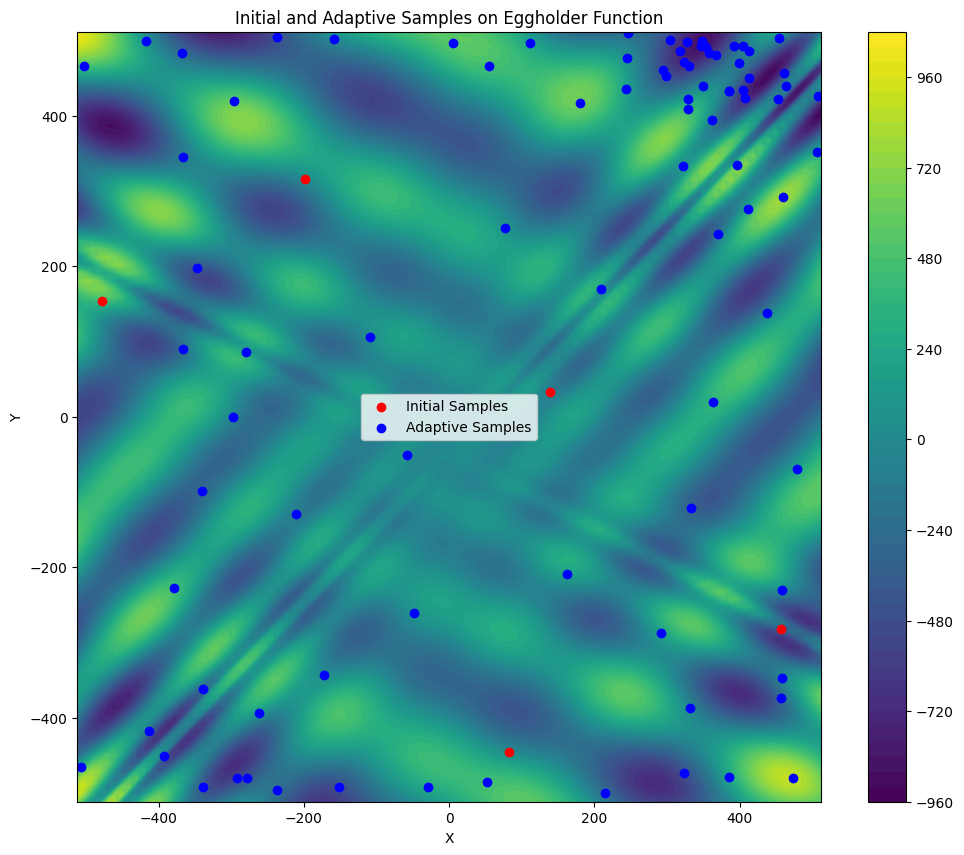

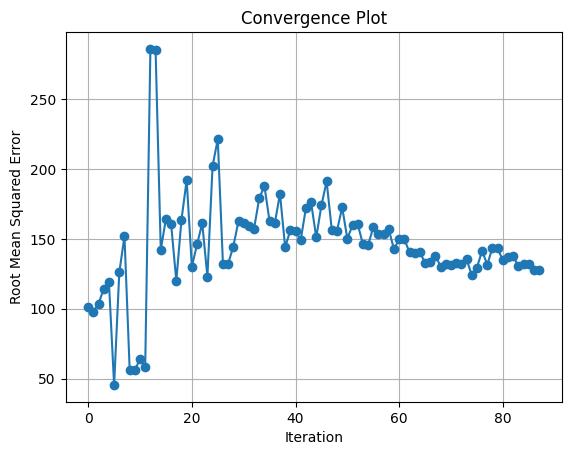

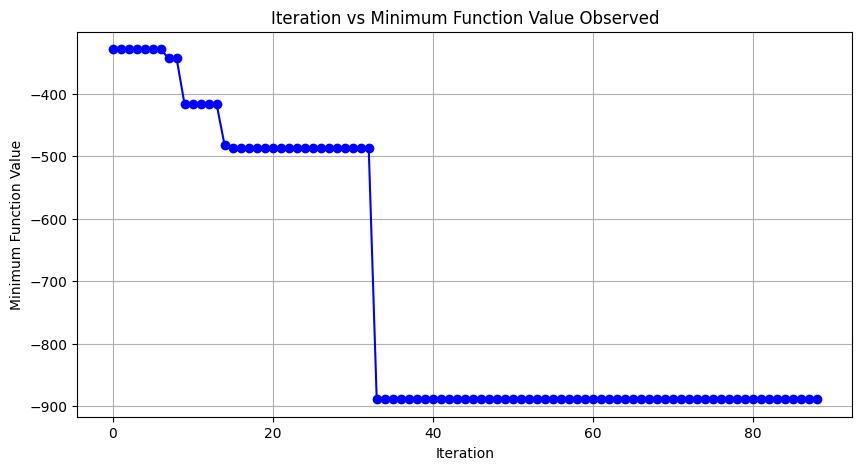

Best observed function value after active learning: -888.8541376074447
             X           Y
0   138.847193   32.268880
1    82.010964 -445.825147
2   456.850455 -282.875041
3  -198.839746  315.648478
4  -477.411792  154.500742
..         ...         ...
89  293.965608  461.529228
90  463.406064  440.193765
91 -277.746471 -479.796978
92  385.311201  432.836332
93  385.311201  432.836332

[94 rows x 2 columns]


In [4]:
# Generate a mesh for the background function
X, Y, Z = samplers.Sampler.generate_mesh([(-512, 512), (-512, 512)], num_points=100, function=ex_func.eggholder)

# Generate initial samples
sampler = samplers.LatinHypercubeSampling(ex_func.eggholder)
initial_points = sampler.sample(num_samples=5, ranges = [(-512, 512), (-512, 512)] )
initial_values = np.array([ex_func.eggholder([x, y]) for x, y in initial_points])

# Train the initial model using random forests
rf_model = models.RandomForestModel(n_estimators=20, random_state=1729)
rf_model.train_model(initial_points, initial_values)
trained_rf_model = rf_model.get_model()

# Perform active learning
active_learning = models.ActiveLearning(initial_points, initial_values, rf_model, sampler)
min_function_values, improvement, new_points_all = active_learning.run_active_learning(200, [(-512, 512), (-512, 512)], 3)

# Plot the results
sampling_vis = gen_def.SamplingVisualization2D(initial_points, np.array(new_points_all), min_function_values, improvement)
sampling_vis.plot_results(X, Y, Z, "Eggholder")